In [17]:
import pandas as pd
import sys
import pickle
from tqdm import tqdm
from scipy.spatial import distance
import torch
import numpy as np

In [7]:
nt = pd.read_csv("data/test_non_torch/features.csv", names=["Idx", "Class", "Path"])
nt["Img"] = [row.split("/")[3] for row in nt["Path"]]
t = pd.read_csv("data/test/features.csv", names=["Idx", "Class", "Path"])
t["Img"] = [row.split("/")[3] for row in t["Path"]]

In [ ]:
features = sorted(csv["Class"].unique().tolist())
sorted(csv["Class"].unique())

In [ ]:
feature_dict = {}
for feature in tqdm(features):
    cl = csv.loc[csv["Class"] == feature].drop_duplicates()
    feature_dict[feature] = []
    for idx, row in cl.iterrows():
        feature_dict[feature].append( (row["Idx"], row["Path"]) )

In [8]:
import glob2
import json
import os

In [ ]:
csv.loc[csv["Class"] == 24].drop_duplicates()

In [54]:
files = glob2.glob("data/train/**/*.pt")

In [55]:
for file in tqdm(files):
    with open(file, "rb") as f:
        data = pickle.load(f)
    # data = torch.load(file)
    
    # a = torch.load(file, map_location=torch.device('cuda:0'))
    os.remove(file)
    # a = torch.FloatTensor(data)
    # with open(file, "wb") as f:
    #     data = pickle.dump(data.tolist(), f)
    torch.save(a, file)
    

100%|██████████| 163787/163787 [21:51<00:00, 124.89it/s]


In [ ]:
csv.loc[[csv["Class"] == 116]]

In [ ]:
ade = pd.read_csv("data/features_150.csv")
for feature in features:
    print(str(ade.loc[ade["Idx"] == feature]["Name"]))

In [15]:
with open("data/figures/test_non_torch_take_2\closest_same_closest_diff/bed\distribution.pckl", "rb") as f:
    data = pickle.load(f)

In [33]:
test_data = np.array(np.linspace(0, 1, 20)).reshape(-1,1)

In [34]:
np.exp(data[0].score_samples(test_data))

array([0.27899891, 0.30120642, 0.32360329, 0.34597754, 0.36810227,
       0.3897392 , 0.41064267, 0.43056415, 0.44925706, 0.46648178,
       0.48201071, 0.49563323, 0.50716051, 0.51642977, 0.52330817,
       0.52769595, 0.52952884, 0.52877962, 0.52545882, 0.51961443])

In [36]:
np.exp(data[1].score_samples(test_data))

array([0.41965792, 0.43890753, 0.4568153 , 0.47314945, 0.48769264,
       0.50024681, 0.51063761, 0.51871849, 0.52437407, 0.52752293,
       0.52811954, 0.52615537, 0.52165908, 0.51469581, 0.50536566,
       0.49380124, 0.48016456, 0.46464326, 0.44744631, 0.42879933])

In [37]:
np.subtract(np.exp(data[0].score_samples(test_data)), np.exp(data[1].score_samples(test_data)))

array([-0.14065901, -0.13770111, -0.13321201, -0.12717191, -0.11959036,
       -0.1105076 , -0.09999494, -0.08815434, -0.07511701, -0.06104115,
       -0.04610884, -0.03052214, -0.01449857,  0.00173396,  0.01794251,
        0.03389471,  0.04936427,  0.06413636,  0.07801251,  0.0908151 ])

In [35]:
data[0].get_params()

{'algorithm': 'auto',
 'atol': 0,
 'bandwidth': 0.75,
 'breadth_first': True,
 'kernel': 'gaussian',
 'leaf_size': 40,
 'metric': 'euclidean',
 'metric_params': None,
 'rtol': 0}

Text(-3.5, 0.31, 'Gaussian Kernel Density')

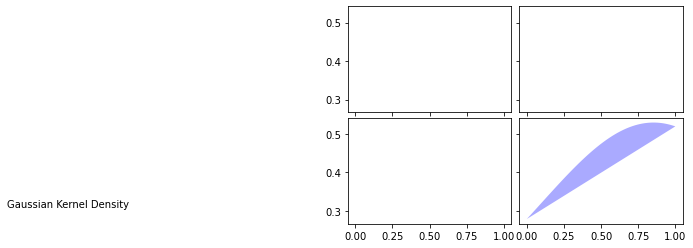

In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version


X_plot = np.linspace(0, 1, 1000)[:, np.newaxis]
bins = np.linspace(0, 1, 10)
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

log_dens = data[0].score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")



In [63]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [131]:
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsClassifier
import torch.nn as nn
import torch

In [42]:
def my_distance(x, y, **kwargs):
    # print(kwargs)
    cos = nn.CosineSimilarity(dim=0, eps=1e-6)

    return float( cos(torch.tensor(x), torch.tensor(y)) )

In [1]:
def build_index(x):
    res = np.zeros( (len(x), 2048), dtype="float16" )
    c = 0
    for idx, row in x.iterrows():
        res[c] = torch.load(row["Path"]+"/indiv_features.pt")[row["Idx"]]
        c+= 1
    return res   

In [132]:
%%time
n = 10000
rng = np.random.RandomState(0)
X = rng.random_sample((n, 2048))
Y = np.random.randint(0, 92, n)
# build_index(n)
knn = NearestNeighbors(algorithm="brute", n_neighbors=1, metric=my_distance)
knn.fit(X, Y)
# knn.predict(rng.random_sample((1, 2048)))
knn.kneighbors(rng.random_sample((1, 2048)))[0][0][0]

rng = np.random.RandomState(0)
X = rng.random_sample((n, 2048))
Y = np.random.randint(0, 92, n)
# build_index(n)
knn = NearestNeighbors(algorithm="brute", n_neighbors=1, metric=my_distance)
knn.fit(X, Y)
# knn.predict(rng.random_sample((1, 2048)))
knn.kneighbors(rng.random_sample((1, 2048)))[0][0][0]



Wall time: 1.68 s


0.7282089400794507

In [75]:
%%time
knn.predict(rng.random_sample((1, 2048)))

Wall time: 1.26 s


array([37])

In [113]:
test = rng.random_sample((2, 2048))

In [119]:
test = np.delete(test, 0, 0)

In [4]:
### Build indexes so wer are nott doing it live
import pickle
import pandas as pd
from tqdm import tqdm
import numpy as np
import torch
csv = pd.read_csv("data/{}/features.csv".format("test_non_torch"), names=["Idx", "Class", "Path"])
same_indexes = {} ; diff_indexes = {}
classes = csv["Class"].unique()

for cl in tqdm(classes, desc="Building Indices"):
    same = csv.loc[csv["Class"] == cl].drop_duplicates()
    diff = csv.loc[csv["Class"] != cl].drop_duplicates()

    sample_length = min( 5000, len(same) )

    same_indexes[cl] = build_index(same.sample(sample_length))
    diff_indexes[cl] = build_index(diff.sample(5000))


Building Indices: 100%|██████████| 66/66 [01:49<00:00,  1.66s/it]


In [5]:
with open("data/test_non_torch/same_index.pckl", "wb") as f, open("data/test_non_torch/diff_index.pckl", "wb") as f1:
    pickle.dump(same_indexes, f)
    pickle.dump(diff_indexes, f1)